In [13]:
!pip install tensorflow
!pip install opencv-python
!pip install opencv-contrib-python
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

     |████████████████████████████████| 60.9 MB 235 kB/s  eta 0:00:01   | 37.7 MB 11.7 MB/s eta 0:00:02
     |████████████████████████████████| 67.1 MB 101 kB/s  eta 0:00:01


In [14]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Q5UXSNeJW12VvQ0KdKWWobadhgmn5n9gF0IZfzPAJ_x2',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'forestfire-donotdelete-pr-hnmfuf1qlfx2uv'
object_key = 'Sprint.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [15]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [4]:
pwd

'/home/wsuser/work'

In [16]:
train=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [10]:
filenames=os.listdir('/home/wsuser/work/Datasets/Train Set')

In [17]:
train_dataset = train.flow_from_directory('/home/wsuser/work/Datasets/Train Set', 
                                          target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 259 images belonging to 2 classes.


In [18]:
test_dataset = test.flow_from_directory('/home/wsuser/work/Datasets/Test Set',
                                        target_size=(128,128),
                                          batch_size = 32,
                                          class_mode = 'binary' )

Found 121 images belonging to 2 classes.


In [19]:
test_dataset.class_indices

{'forest': 0, 'with fire': 1}

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
model = keras.Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

In [41]:
model.add(Dense(150,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [42]:
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [43]:
r = model.fit(train_dataset, epochs = 5, validation_data = test_dataset)

Epoch 1/5
9/9 [==============================] - 18s 2s/step - loss: 0.6634 - accuracy: 0.6178 - val_loss: 0.5952 - val_accuracy: 0.6942
Epoch 2/5
9/9 [==============================] - 16s 2s/step - loss: 0.5277 - accuracy: 0.7529 - val_loss: 0.2393 - val_accuracy: 0.9256
Epoch 3/5
9/9 [==============================] - 16s 2s/step - loss: 0.2816 - accuracy: 0.8880 - val_loss: 0.1371 - val_accuracy: 0.9339
Epoch 4/5
9/9 [==============================] - 16s 2s/step - loss: 0.2210 - accuracy: 0.9421 - val_loss: 0.0688 - val_accuracy: 0.9835
Epoch 5/5
9/9 [==============================] - 16s 2s/step - loss: 0.1892 - accuracy: 0.9266 - val_loss: 0.1108 - val_accuracy: 0.9504


In [67]:
model.save('/home/wsuser/work/Archive/forest1.h5')

In [45]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

In [46]:
predictions

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],

In [47]:
print(len(predictions))

121


In [50]:
from keras.models import load_model

In [68]:
model = load_model('/home/wsuser/work/Archive/forest1.h5')

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [55]:
import numpy as np

In [57]:
def predictImage(filename):
  img1 = image.load_img(filename,target_size=(128,128))
  Y = image.img_to_array(img1)
  X = np.expand_dims(Y,axis=0)
  val = model.predict(X)
  print(val)
  if val == 1:
    print(" fire")
  elif val == 0:
      print("no fire")

In [59]:
predictImage('/home/wsuser/work/Datasets/Test Set/with fire/Fire_2_696x392.jpg')

[[1.]]
 fire


In [60]:
pip install twilio

     |████████████████████████████████| 1.4 MB 15.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install playsound

  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7037 sha256=6af61b7dbe2774ea2ccc188aace85125ae9334838f5f29887e4e1a0bc16a9ce2
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ba/39/54/c8f7ff9a88a644d3c58b4dec802d90b79a2e0fb2a6b884bf82
Successfully built playsound
Note: you may need to restart the kernel to use updated packages.


In [63]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
from twilio.rest import Client
from playsound import playsound

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [71]:
model = load_model('/home/wsuser/work/Archive/forest1.h5')
name= ['forest','with fire']

In [80]:
pip uninstall -y opencv-python

Found existing installation: opencv-python 4.6.0.66
Uninstalling opencv-python-4.6.0.66:
  Successfully uninstalled opencv-python-4.6.0.66
Note: you may need to restart the kernel to use updated packages.


In [81]:
pip uninstall -y opencv-contrib-python 

Found existing installation: opencv-contrib-python 4.6.0.66
Uninstalling opencv-contrib-python-4.6.0.66:
  Successfully uninstalled opencv-contrib-python-4.6.0.66
Note: you may need to restart the kernel to use updated packages.


In [84]:
pip list | grep opencv

opencv-python-headless        4.6.0.66
Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install opencv-python-headless 

     |████████████████████████████████| 48.3 MB 8.6 MB/s eta 0:00:01 MB 8.6 MB/s eta 0:00:05▍                     | 15.7 MB 8.6 MB/s eta 0:00:04��█▋              | 26.5 MB 8.6 MB/s eta 0:00:03
Note: you may need to restart the kernel to use updated packages.


In [79]:
account_sid =  'AC2102b717ef39d602ccc9d7dfff8bff08'
auth_token = 'b16a9dee82d1c19f7811a4243db8d3a3'
client = Client(account_sid, auth_token)

message = client.messages.create(
      body='Fire, Stay Safe',
      from_='+18585445363',
      to='+919769038810'
                      )
print(message.sid)

SM4ebe3d061c8d59f9b2bacc0cce33689d


In [88]:
def message(val):
  if val==1:
    from twilio.rest import Client
    print('Forest fire')
    account_sid =  'AC2102b717ef39d602ccc9d7dfff8bff08'
    auth_token = 'b16a9dee82d1c19f7811a4243db8d3a3'
    client = Client(account_sid, auth_token)

    message = client.messages.create(
      body='Fire, Stay Safe',
      from_='+18585445363',
      to='+919769038810'
                      )
    print(message.sid)
    print("Fire detected")
    print("SMS Sent!")
  elif val==0:
    print('No Fire')

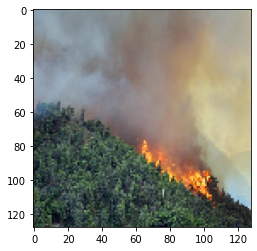

No Fire


In [92]:
from matplotlib import pyplot as plt
from keras.models import load_model
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/home/wsuser/work/Datasets/Test Set/with fire/Forest_Fire (3).jpg',target_size=(128,128))
Y = image.img_to_array(img1)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img1)
plt.show()
message(val)

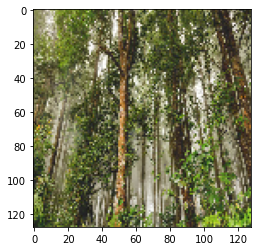

No Fire


In [91]:
img2 = image.load_img('/home/wsuser/work/Datasets/Test Set/forest/091318_LH_forest_loss_main_FREE.jpg',target_size=(128,128))
Y = image.img_to_array(img2)
x = np.expand_dims(Y,axis=0)
val = model.predict(x)
plt.imshow(img2)
plt.show()
message(val)